# Sampling

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

The pointer estimators themselves are random variables. For instance we have 10 samples of household income, so each sample has a mean value, which are most probably different than each other, therefore the sample mean is essentially a random variable.|

The distribution of point estimator is called the  **sampling distribution**, i.e. the distribution of sample statistics. The knowledge of its properties will enable us to make statements about how close the point estimates (e.g. sample mean) to the population parameters.

## Sampling Distribution of $\bar{X}$

If point estimators are unbiased, then  **mean of sampling distribution** and  **standard error of the mean** are:
$$
E(\bar{X})=μ\\
σ_{\bar{X}}=\frac{σ}{\sqrt{n}}\sqrt{\frac{N-n}{N-1}}
$$

The name of _standard error_ generally is used when referring to the standard deviation of a sampling distribution.

To illustrate the sampling distribution of $\bar{X}$, we will generate a population of $100000$ people's height with standard deviation of $3$, mean of $170$cm.

In [ ]:
mu = 170
sigma = 3
pop_size = 100000
pop_height = stats.norm.rvs(mu, sigma, size = pop_size) 

Now pretend that we know nothing of the population, but we are able to draw as many samples as possible with zero cost (this will never be possible in real world, but perfect illustration to sampling distribution). After drawing each sample we calculate the sample mean then append onto the list ```sample_mean```, finally we plot the histogram.

Here we plot six sampling distributions with increasing sample sizes, the larger the sample size $n$, the smaller the standard errors are. The red dashed line is a normal distribution $z∼ N(170, 3)$, in contrast, the histogram of sample mean is much concentrated.

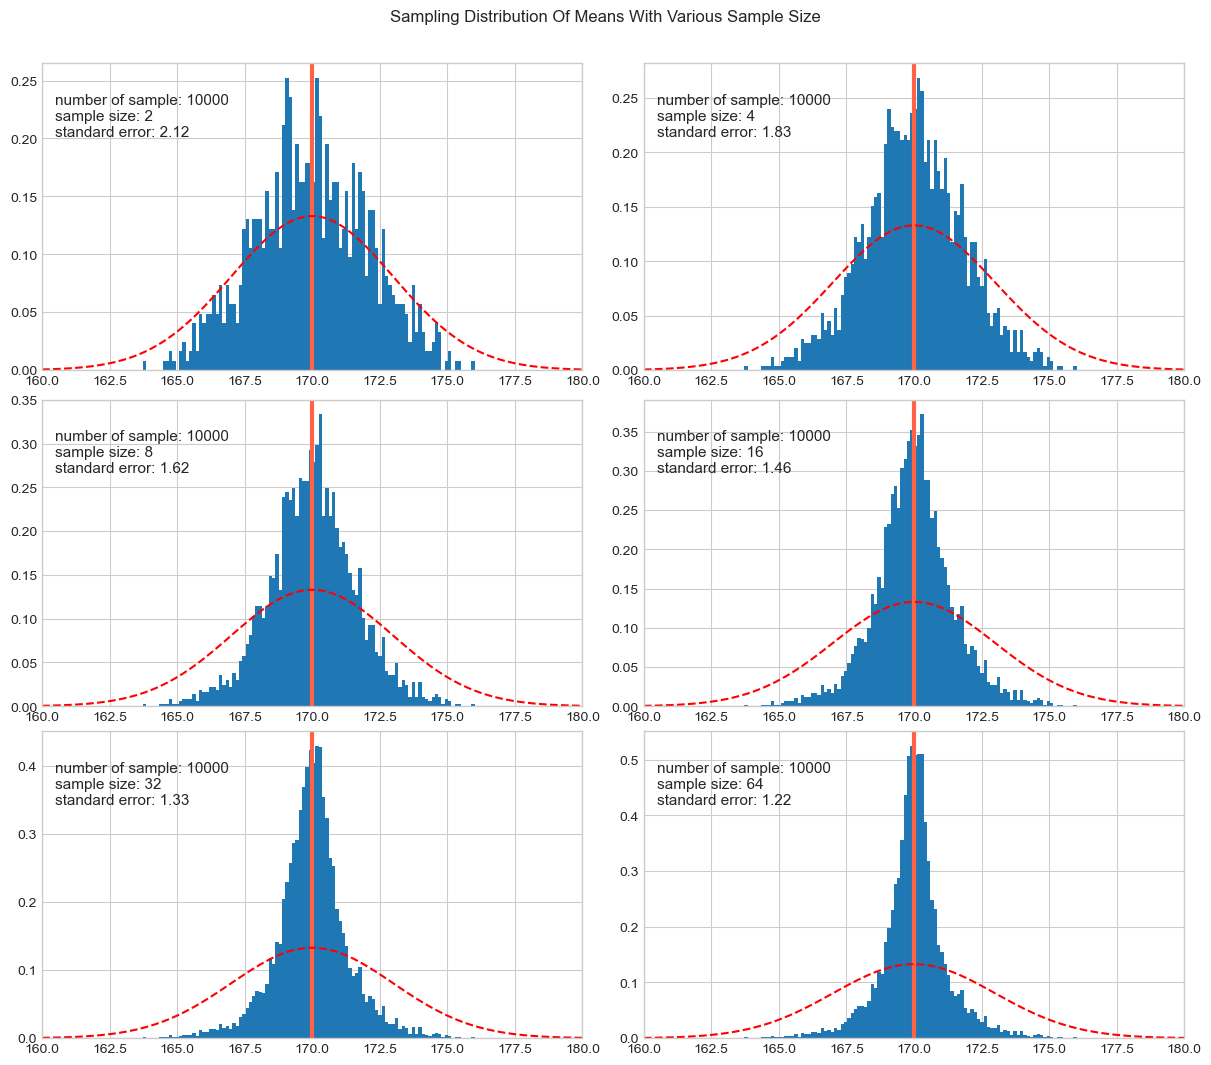

In [ ]:
sample_sizes = [2**i for i in range(1, 7)]
number_of_sample = 1000
sample_means = []

norm_pdf_x = np.linspace(160, 180, 100)
norm_pdf_y = stats.norm.pdf(norm_pdf_x, mu, sigma)

fig, axes = plt.subplots(3,
                         2,
                         figsize=(12, 10),
                         dpi=100,
                         constrained_layout=True)

for ind, ax in enumerate(axes.flatten()):
    for i in range(number_of_sample):
        sample_means.append(
            np.mean(np.random.choice(pop_height, size=sample_sizes[ind])))
    n, bins, patches = ax.hist(sample_means,
                               bins=100,
                               label='Sampling Distribution of Mean of Height',
                               density=True)
    ax.axvline(x=mu, color='tomato', lw=3)
    ax.plot(norm_pdf_x, norm_pdf_y, 'r--', label="$z∼ N(170, 3)$")
    ax.set(xlim=(160, 180))
    ax.annotate(
        f'number of sample: {10000}\nsample size: {sample_sizes[ind]}\nstandard error: {np.std(sample_means, ddof=1):.2f}',
        (160.5, np.max(n) * .8),
        size=11)
fig.suptitle('Sampling Distribution Of Means With Various Sample Size', y=1.05)
plt.show()

From $σ_{\bar{x}}=\frac{σ}{\sqrt{n}}\sqrt{\frac{N-n}{N-1}}$, we can see as $n →  N$, then $σ_{\bar{x}}→  0$.

Though raising sample size can contract the variation of sampling distribution,  but efficiency drops relatively fast. Take a look at graph of $\sqrt{n}$, the slope is steep in the beginning, then flattens as the sample size increases.

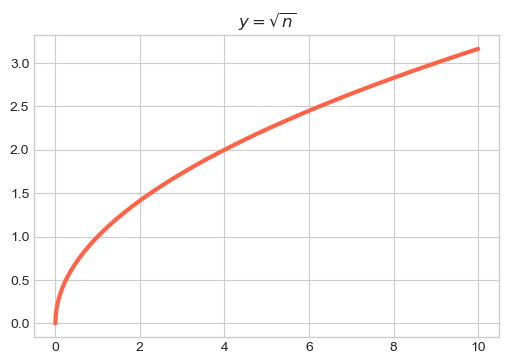

In [ ]:
x = np.linspace(0, 10, 1000)
y = np.sqrt(x)

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(x, y, color='tomato', lw=3)
ax.set(title='$y=\sqrt{n}$')
plt.show()

There are also sampling distribution of sample variances.

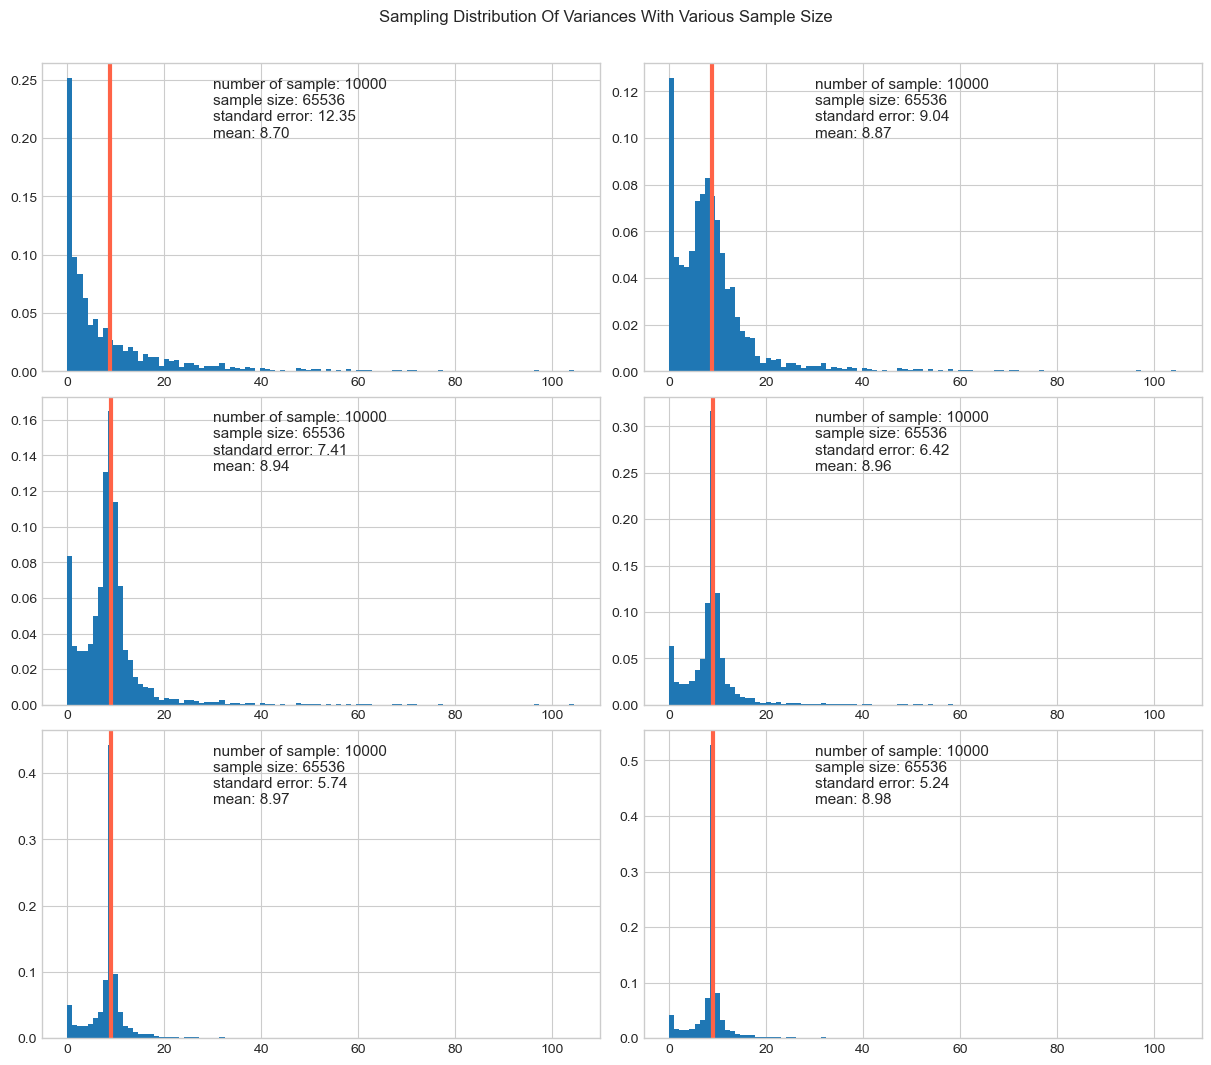

In [ ]:
sample_sizes = [2**i for i in range(1, 18, 3)]
number_of_sample = 1000
sample_vars = []

fig, axes = plt.subplots(3,
                         2,
                         figsize=(12, 10),
                         dpi=100,
                         constrained_layout=True)

for indx, ax in enumerate(axes.flatten()):
    for i in range(number_of_sample):
        sample_vars.append(
            np.var(np.random.choice(pop_height, size=sample_sizes[indx]),
                   ddof=1))
    n, bins, patches = ax.hist(
        sample_vars,
        bins=100,
        label='Sampling Distribution of Variance of Height',
        density=True)
    ax.axvline(x=np.mean(sample_vars), color='tomato', lw=3)
    ax.annotate(
        f'number of sample: {10000}\nsample size: {sample_sizes[ind]}\nstandard error: {np.std(sample_vars, ddof=1):.2f}\nmean: {np.mean(sample_vars):.2f}',
        (30, np.max(n) * .80),
        size=11)

fig.suptitle('Sampling Distribution Of Variances With Various Sample Size',
             y=1.05)
plt.show()

# Central Limit Theorem

We mentioned above that properties of sampling distribution can help us making meaningful inferences about population. The most important property is **Central Limit Theorem** which guarantees that with large sample size, we can safely assume the sample mean follows a normal distribution. With this information, we can make statistical inferences such as how far away the sample mean is from the population mean?

Here is the classical definition:

$\{\bar{X}_1,...\bar{X}_2\}$ is a random i.i.d. sequence drawn from an unknown distribution whose $E(X_i)=μ$ and $\text{Var}(X_i)=σ^2$, as $n →  ∞$, we have

$$
\sqrt{n}(\bar{X}_n-μ)\xrightarrow[]{d} N(0, σ^2)
$$

Simply speaking, sampling distribution of sample mean will converge to a normal distribution when sample size is large enough. The figure below shows three different distributions other than normal distribution, as the sample size increases their sampling distributions converge to normal distribution.

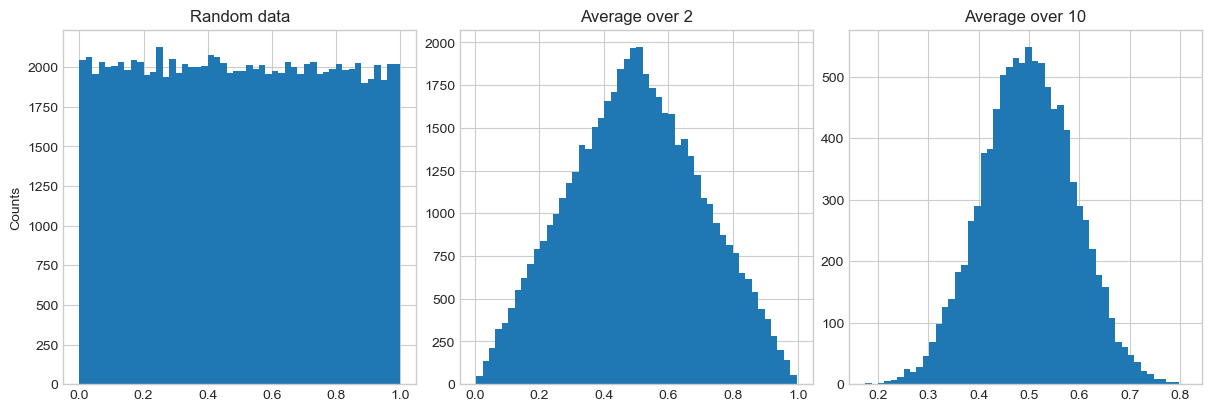

In [ ]:
n_data = 100000
n_bins = 50

data = np.random.random(n_data)

_, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=100, constrained_layout=True)

axes[0].hist(data, bins=n_bins)
axes[0].set(ylabel='Counts', title='Random data')
axes[1].hist(np.mean(data.reshape((n_data // 2, 2)), axis=1), bins=n_bins)
axes[1].set(title='Average over 2')
axes[2].hist(np.mean(data.reshape((n_data // 10, 10)), axis=1), bins=n_bins)
axes[2].set(title='Average over 10')

plt.show()

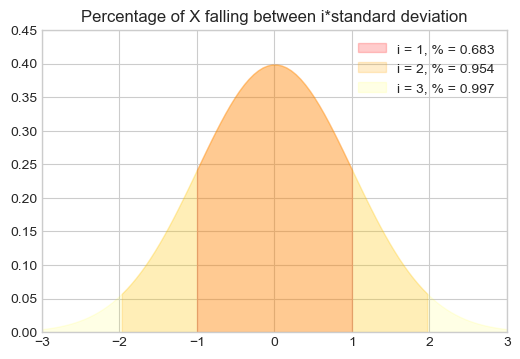

In [ ]:
loc, scale = 0, 1
alphas = [.2, .2, .1]
colors = ['red', 'orange', 'yellow']

func = stats.norm(loc, scale)

X = np.linspace(-3, 3, 100)
y = func.pdf(X)

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

for i, (color, alpha) in enumerate(zip(colors, alphas)):
    start = loc - scale * (i + 1)
    end = loc + scale * (i + 1)
    y_fall = func.cdf(end) - func.cdf(start)

    X_dist = X[X <= end][X[X <= end] >= start]
    y_dist = func.pdf(X_dist)
    ax.fill_between(X_dist,
                    y_dist,
                    color=color,
                    alpha=alpha,
                    label=f'i = {i + 1}, % = {round(y_fall, 3)}')

ax.set(title='Percentage of X falling between i*standard deviation')
ax.axis((-3, 3, 0, 0.45))
ax.legend()
plt.show()

# $χ^2$ Distribution

$χ^2$ distribution is closely connected with normal distributions, if $z$ has the standard normal distribution, then $z^2$ has the $χ^2$ distribution with $d.f.=1$. And further,if

$$
\begin{equation}
z_1, z_2, ..., z_k ∼ i.i.d. N(0, 1)
\end{equation}
$$

Then summation has a $χ^2$ distribution of $d.f. = k$:

$$
\begin{equation}
∑_{i=0}^k z_i^2 ∼ χ^2(k)
\end{equation}
$$

We will see in later chapters how $χ^2$ distribution is referred when performing hypothesis testing.

### $χ^2$ PDF and CDF

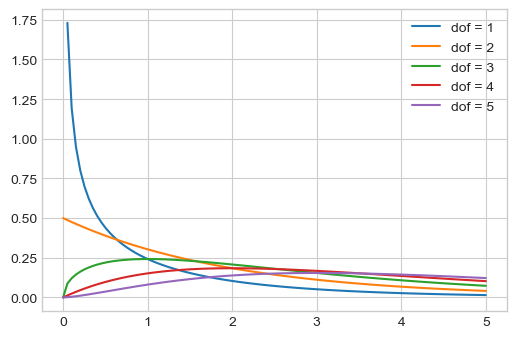

In [ ]:
x = np.linspace(0, 5, 100)

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

for k in range(1, 6):
    chi_pdf = stats.chi2.pdf(x, k)
    ax.plot(x, chi_pdf, label=f'dof = {k}')

ax.legend()
plt.show()

## Student's t Distribution

The **t-distribution** is used when data are approximately normally distributed, which means the data follow a bell shape but the population variance is unknown. We will come back to this topic in chapter of estimation.

The PDF of t-distribution is derived from normal and $χ^2$ distribution
$$
f(t)=\frac{Γ\left(\frac{ν+1}{2}\right)}{\sqrt{ν π} Γ\left(\frac{ν}{2}\right)}\left(1+\frac{t^{2}}{ν}\right)^{-\frac{ν+1}{2}}
$$
No need to know the meaning of its components. But we do need a visual memory of the comparison of t-distribution and normal distribution.

If a sample has $n$ observations, then the degree of freedom (d.o.f.) of t-distribution is $n-1$, the larger the d.o.f. the closer to normal distribution.

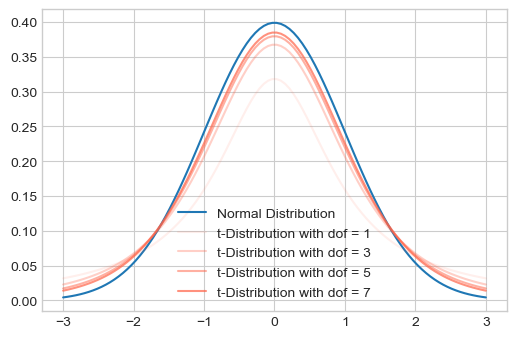

In [ ]:
x = np.linspace(-3, 3, 100)
y_norm = stats.norm.pdf(x, loc=0, scale=1)

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(x, y_norm, label='Normal Distribution')

for i in range(1, 9, 2):
    y_t = stats.t.pdf(x, df=i, loc=0, scale=1)
    ax.plot(x,
            y_t,
            color='tomato',
            alpha=.1 * i,
            label=f't-Distribution with dof = {i}')
ax.legend()
plt.show()

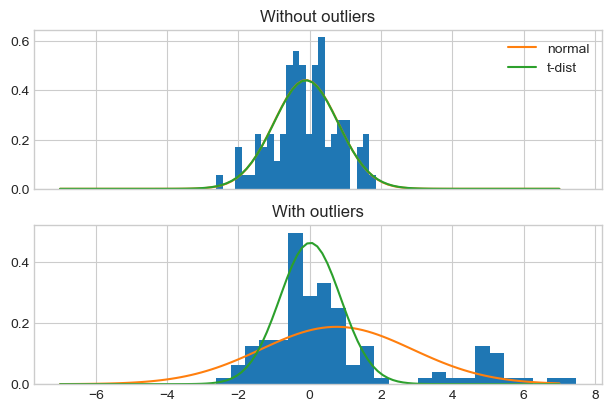

In [ ]:
np.random.seed(42)
ndata = 100
data = stats.norm.rvs(size=(ndata, ))
noise = stats.norm.rvs(5, size=(20, ))
data_outlier = np.hstack((data, noise))

fit_gauss_wo = stats.norm.fit(data)
fit_gauss_w = stats.norm.fit(data_outlier)
fit_t_wo = stats.t.fit(data)
fit_t_w = stats.t.fit(data_outlier)

fitted_x = np.linspace(-7, 7, ndata)
fitted_gauss_wo = stats.norm.pdf(fitted_x,
                                 loc=fit_gauss_wo[0],
                                 scale=fit_gauss_wo[1])
fitted_gauss_w = stats.norm.pdf(fitted_x,
                                loc=fit_gauss_w[0],
                                scale=fit_gauss_w[1])
fitted_t_wo = stats.t.pdf(fitted_x,
                          df=ndata - 1,
                          loc=fit_t_wo[1],
                          scale=fit_t_wo[2])
fitted_t_w = stats.t.pdf(fitted_x,
                         df=ndata - 1,
                         loc=fit_t_w[1],
                         scale=fit_t_w[2])

_, axes = plt.subplots(2, 1, dpi=100, sharex=True, constrained_layout=True)

axes[0].hist(data, density=True, bins=25)
axes[0].plot(fitted_x, fitted_gauss_wo, label='normal')
axes[0].plot(fitted_x, fitted_t_wo, label='t-dist')
axes[0].set(title='Without outliers')
axes[0].legend()

axes[1].hist(data_outlier, density=True, bins=25)
axes[1].plot(fitted_x, fitted_gauss_w, label='norm')
axes[1].plot(fitted_x, fitted_t_w, label='t-dist')
axes[1].set(title='With outliers')

plt.show()

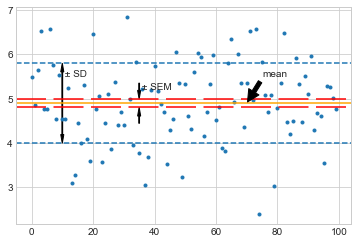

In [ ]:
np.random.seed(42)
x = np.random.randn(100) + 5

std = np.std(x, ddof=1)
sem = stats.sem(x)

sd = np.mean(x) + std * np.r_[-1, 1]
se = np.mean(x) + sem * np.r_[-1, 1]

_, ax = plt.subplots()

ax.plot(x, '.')
ax.axhline(np.mean(x), color='orange')
ax.axhline(sd[0], ls='--')
ax.axhline(sd[1], ls='--')

dashes = [20, 5]
ax.axhline(se[0], ls='--', color='r').set_dashes(dashes)
ax.axhline(se[1], ls='--', color='r').set_dashes(dashes)

arrow = dict(width=0.25,
             length_includes_head=True,
             head_length=0.2,
             head_width=1,
             color='k')

ax.arrow(10, np.mean(x), 0, std, **arrow)
ax.arrow(10, np.mean(x), 0, -std, **arrow)
ax.arrow(35, np.mean(x) - 5 * sem, 0, 4 * sem, **arrow)
ax.arrow(35, np.mean(x) + 5 * sem, 0, -4 * sem, **arrow)

ax.text(10, 5.5, ' ± SD')
ax.text(35, 5.2, ' ± SEM')
ax.annotate(text='mean',
            xy=(70, np.mean(x)),
            xycoords='data',
            fontsize='medium',
            xytext=(75, 5.5),
            textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()


# F Distribution

If $U_1$ has a $χ^2$ distribution with $ν_1$ d.f. and $U_2$ has a $χ^2$ distribution with $ν_2$ d.f., then

$$
\begin{equation}
\frac{U_1/ν_1}{U_2/ν_2}∼ F(ν_1, ν_2)
\end{equation}
$$

We are using $F$ distribution for ratios of variances.

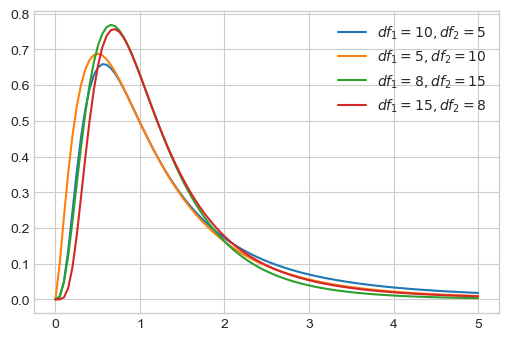

In [ ]:
x = np.linspace(0, 5, 100)

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

df1s = [10, 5, 8, 15]
df2s = [5, 10, 15, 8]

for df1, df2 in zip(df1s, df2s):
    f_pdf = stats.f.pdf(x, dfn = df1, dfd = df2)
    ax.plot(x, f_pdf, label=f'$df_1 = {df1}, df_2 = {df2}$')

ax.legend()
plt.show()

$χ^2$ and $F$ distribution are mostly used for statistical testing, we will elaborate the topic later.